In [290]:
import requests, ast
import numpy as np
import pandas as pd
from datetime import datetime
import time as t
key = ''
latitude = 32.7152778
longitude = -117.1563889

In [320]:
def sd_low_high(tiempo):
    response = requests.get(f"https://api.darksky.net/forecast/{key}/{latitude},{longitude},{tiempo}?exclude=currently,minutely,hourly").text
    data = ast.literal_eval(response)['daily']['data'][0]
    
    if 'temperatureHigh' in data:
        high = data['temperatureHigh']
    else:
        high = None
        
    if 'temperatureLow' in data:
        low = data['temperatureLow']
    else:
        low = None
        
    return (low,high)

In [365]:
def get_weather_data(year = 2018):
    date = datetime(year,1,1)
    time = int(date.timestamp())
    daily_temps = []
    dates = []
    lows = []
    highs = []
    i = 0
    while i < 31557600:
        dates.append(datetime.fromtimestamp(time + i))
        low, high = sd_low_high(time + i)
        lows.append(low)
        highs.append(high)
        i+=86400
    
    weather_data_raw = pd.DataFrame(np.column_stack([dates,lows,highs]), columns = ['date','low','high'])
    is_req_year = weather_data_raw.date.dt.year == year

    return weather_data_raw[is_req_year]

In [322]:
df2018 = get_weather_data(2018); df2018.head()

,date,lows,highs
0,2018-01-01 00:00:00,48.71,69.65
1,2018-01-02 00:00:00,53.69,70.61
2,2018-01-03 00:00:00,56.22,78.37
3,2018-01-04 00:00:00,54.38,73.23
4,2018-01-05 00:00:00,55.99,77.4


In [353]:
df2018[df2018.isnull().any(axis=1)]

,date,lows,highs
302,2018-10-30 01:00:00,None,None


In [354]:
df2018 = df2018.fillna(method = 'bfill')

In [355]:
df2018[df2018.isnull().any(axis=1)]

,date,lows,highs


In [387]:
df2018['avg'] = df2018[['low','high']].mean(axis=1)
df2018['month'] = df2018['date'].dt.month

In [396]:
df1970['month'] = df1970['date'].dt.month
m_avg_df1970 = df1970.resample('M', on='date').mean(); m_avg_df1970
m_avg_df1970 = m_avg_df1970.set_index('month'); m_avg_df1970

,low,high,avg
month,,,
1,51.058065,62.973548,57.015806
2,52.883571,67.668929,60.276250
3,53.109677,65.073226,59.091452
4,52.767000,65.601667,59.184333
5,58.321290,69.862258,64.091774
6,61.705000,69.329333,65.517167
7,65.440323,74.576129,70.008226
8,66.763226,76.131290,71.447258
9,61.075000,75.591000,68.333000


In [395]:
m_avg_df2018 = df2018.resample('M', on='date').mean() 
m_avg_df2018 = m_avg_df2018.set_index('month'); m_avg_df2018

,low,high,avg
month,,,
1,54.184839,72.787742,63.486290
2,50.687143,69.269643,59.978393
3,52.612581,67.956774,60.284677
4,55.296333,73.235667,64.266000
5,57.596774,70.464516,64.030645
6,61.776667,77.205333,69.491000
7,68.964516,86.211613,77.588065
8,70.519032,86.880000,78.699516
9,65.289000,82.331000,73.810000


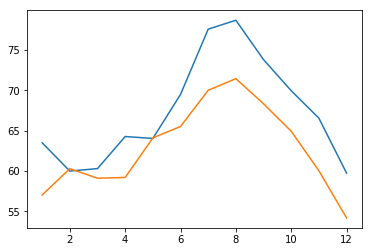

In [397]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(m_avg_df2018.avg)
plt.plot(m_avg_df1970.avg)